# **EDA on Stories POS Reports**

This notebook explores the cleaned Stories datasets and provides end-to-end visual analysis for sales, profit, categories, groups, branches, and monthly trends.

## **Load Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

try:
    import plotly.express as px
    HAS_PLOTLY = True
except Exception:
    HAS_PLOTLY = False
    print('Plotly is not installed. Interactive charts will be skipped.')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style='whitegrid', palette='Set2')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 180)


In [3]:
BASE_PATH = Path('/content/drive/MyDrive/cleaned')
if not BASE_PATH.exists():
    if Path('./cleaned').exists():
        BASE_PATH = Path('./cleaned')
    else:
        BASE_PATH = Path('./Archive/Stories_data/cleaned')

print(f'Using data folder: {BASE_PATH.resolve()}')

paths = {
    'item_profit': BASE_PATH / 'rep_00014_theoretical_profit_by_item_clean.csv',
    'group_sales': BASE_PATH / 'rep_00191_sales_by_items_by_group_clean.csv',
    'category_profit': BASE_PATH / 'rep_00673_theoretical_profit_by_category_clean.csv',
    'monthly_sales_wide': BASE_PATH / 'rep_00134_comparative_monthly_sales_clean_wide.csv',
    'monthly_sales_long': BASE_PATH / 'rep_00134_comparative_monthly_sales_clean_long.csv'
}

for key, p in paths.items():
    print(f'{key:20s} -> {p} | exists={p.exists()}')


Using data folder: /content/drive/MyDrive/cleaned
item_profit          -> /content/drive/MyDrive/cleaned/rep_00014_theoretical_profit_by_item_clean.csv | exists=True
group_sales          -> /content/drive/MyDrive/cleaned/rep_00191_sales_by_items_by_group_clean.csv | exists=True
category_profit      -> /content/drive/MyDrive/cleaned/rep_00673_theoretical_profit_by_category_clean.csv | exists=True
monthly_sales_wide   -> /content/drive/MyDrive/cleaned/rep_00134_comparative_monthly_sales_clean_wide.csv | exists=True
monthly_sales_long   -> /content/drive/MyDrive/cleaned/rep_00134_comparative_monthly_sales_clean_long.csv | exists=True


In [4]:
df_item = pd.read_csv(paths['item_profit'])
df_group = pd.read_csv(paths['group_sales'])
df_cat = pd.read_csv(paths['category_profit'])
df_month_wide = pd.read_csv(paths['monthly_sales_wide'])
df_month_long = pd.read_csv(paths['monthly_sales_long'])

datasets = {
    'item_profit': df_item,
    'group_sales': df_group,
    'category_profit': df_cat,
    'monthly_sales_wide': df_month_wide,
    'monthly_sales_long': df_month_long
}

for name, df in datasets.items():
    print(f'{name:20s} shape={df.shape}')


item_profit          shape=(13143, 13)
group_sales          shape=(12261, 9)
category_profit      shape=(75, 10)
monthly_sales_wide   shape=(50, 17)
monthly_sales_long   shape=(650, 8)


In [5]:
# Ensure numeric columns are numeric
item_num_cols = ['qty', 'total_price', 'total_cost', 'total_cost_pct', 'total_profit', 'total_profit_pct']
group_num_cols = ['qty', 'total_amount']
cat_num_cols = ['qty', 'total_price', 'total_cost', 'total_cost_pct', 'total_profit', 'total_profit_pct']
month_wide_num_cols = ['year', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'total_by_year']
month_long_num_cols = ['year', 'month_number', 'sales_amount']

for col in item_num_cols:
    df_item[col] = pd.to_numeric(df_item[col], errors='coerce')
for col in group_num_cols:
    df_group[col] = pd.to_numeric(df_group[col], errors='coerce')
for col in cat_num_cols:
    df_cat[col] = pd.to_numeric(df_cat[col], errors='coerce')
for col in month_wide_num_cols:
    if col in df_month_wide.columns:
        df_month_wide[col] = pd.to_numeric(df_month_wide[col], errors='coerce')
for col in month_long_num_cols:
    if col in df_month_long.columns:
        df_month_long[col] = pd.to_numeric(df_month_long[col], errors='coerce')


In [6]:
def quick_profile(name, df, head_n=3):
    print(f'\n{name} | rows={len(df):,} cols={df.shape[1]}')
    display(df.head(head_n))
    display(df.dtypes.rename('dtype').to_frame())

for name, df in datasets.items():
    quick_profile(name, df)



item_profit | rows=13,143 cols=13


,source_file,row_type,branch,department,category,division,product_desc,qty,total_price,total_cost,total_cost_pct,total_profit,total_profit_pct
0,rep_s_00014_SMRY.csv,item,Stories - Bir Hasan,TAKE AWAY,BEVERAGES,COLD BAR SECTION,1 SHOT DECAFE,404.0,0.0,3856.85,0.0,-3856.85,100.0
1,rep_s_00014_SMRY.csv,item,Stories - Bir Hasan,TAKE AWAY,BEVERAGES,COLD BAR SECTION,2 SHOT DECAFE,637.0,0.0,12162.45,0.0,-12162.45,100.0
2,rep_s_00014_SMRY.csv,item,Stories - Bir Hasan,TAKE AWAY,BEVERAGES,COLD BAR SECTION,3 SHOT DECAFE,113.0,0.0,3236.32,0.0,-3236.32,100.0


,dtype
source_file,object
row_type,object
branch,object
department,object
category,object
division,object
product_desc,object
qty,float64
total_price,float64
total_cost,float64



group_sales | rows=12,261 cols=9


,source_file,row_type,branch,division,group,description,barcode,qty,total_amount
0,rep_s_00191_SMRY-3.csv,item,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,ESPRESSO,NaN,3313.0,500103.75
1,rep_s_00191_SMRY-3.csv,item,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,DOUBLE ESPRESSO,NaN,3200.0,498631.33
2,rep_s_00191_SMRY-3.csv,item,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,AMERICANO SMALL,NaN,902.0,176816.53


,dtype
source_file,object
row_type,object
branch,object
division,object
group,object
description,object
barcode,float64
qty,float64
total_amount,float64



category_profit | rows=75 cols=10


,source_file,row_type,branch,category,qty,total_price,total_cost,total_cost_pct,total_profit,total_profit_pct
0,rep_s_00673_SMRY.csv,category,Stories - Bir Hasan,BEVERAGES,137572.1,1841385.84,4143855.17,22.50,14270003.22,77.50
1,rep_s_00673_SMRY.csv,category,Stories - Bir Hasan,FOOD,102791.4,1264966.00,4658225.80,36.82,7991434.23,63.18
2,rep_s_00673_SMRY.csv,branch_total,Stories - Bir Hasan,Total By Branch,240363.5,3106351.84,8802080.97,28.34,22261437.45,71.66


,dtype
source_file,object
row_type,object
branch,object
category,object
qty,float64
total_price,float64
total_cost,float64
total_cost_pct,float64
total_profit,float64
total_profit_pct,float64



monthly_sales_wide | rows=50 cols=17


,source_file,row_type,year,branch,january,february,march,april,may,june,july,august,september,october,november,december,total_by_year
0,REP_S_00134_SMRY.csv,branch,2025,Stories - Bir Hasan,3355705.33,2842993.67,2266050.67,3459979.67,2125379.33,744638.33,3799740.25,3783897.91,3255935.75,3128528.54,2851287.10,2743087.70,3.435722e+07
1,REP_S_00134_SMRY.csv,branch,2025,Stories Ain El Mreisseh,12648546.67,9929973.33,9849926.67,13025923.33,7208975.00,2883403.33,11889329.16,11610097.92,11021123.75,10516783.81,9387782.61,9640996.43,1.196129e+08
2,REP_S_00134_SMRY.csv,branch,2025,Stories Airport,0.00,0.00,0.00,0.00,0.00,8428.83,2940003.01,6963426.45,7467197.62,8414672.70,7029720.14,6604828.86,3.942828e+07


,dtype
source_file,object
row_type,object
year,int64
branch,object
january,float64
february,float64
march,float64
april,float64
may,float64
june,float64



monthly_sales_long | rows=650 cols=8


,source_file,row_type,year,branch,period,period_type,month_number,sales_amount
0,REP_S_00134_SMRY.csv,branch,2025,Stories - Bir Hasan,january,month,1.0,3355705.33
1,REP_S_00134_SMRY.csv,branch,2025,Stories - Bir Hasan,february,month,2.0,2842993.67
2,REP_S_00134_SMRY.csv,branch,2025,Stories - Bir Hasan,march,month,3.0,2266050.67


,dtype
source_file,object
row_type,object
year,int64
branch,object
period,object
period_type,object
month_number,float64
sales_amount,float64


## **Distribution Analysis**

### **Data Size**

,dataset,rows,columns
0,item_profit,13143,13
1,group_sales,12261,9
2,category_profit,75,10
3,monthly_sales_wide,50,17
4,monthly_sales_long,650,8


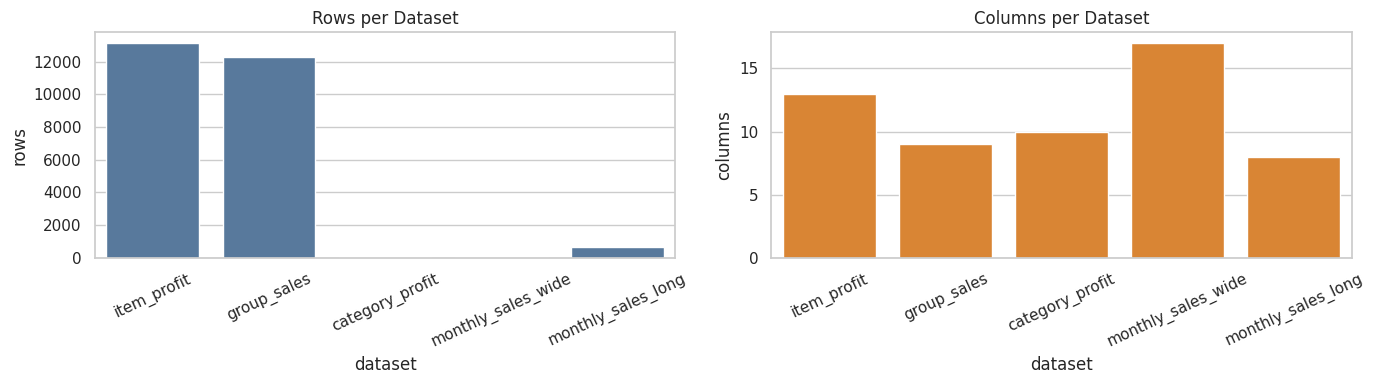

In [7]:
size_df = pd.DataFrame({
    'dataset': list(datasets.keys()),
    'rows': [len(df) for df in datasets.values()],
    'columns': [df.shape[1] for df in datasets.values()]
})

display(size_df)

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.barplot(data=size_df, x='dataset', y='rows', ax=ax[0], color='#4C78A8')
ax[0].set_title('Rows per Dataset')
ax[0].tick_params(axis='x', rotation=25)

sns.barplot(data=size_df, x='dataset', y='columns', ax=ax[1], color='#F58518')
ax[1].set_title('Columns per Dataset')
ax[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()


### **Missing Values**

,dataset,column,missing_count,missing_pct
0,item_profit,division,147,1.12
1,item_profit,category,67,0.51
2,item_profit,department,25,0.19
3,group_sales,barcode,12261,100.00
4,group_sales,group,427,3.48
5,group_sales,division,25,0.20
6,monthly_sales_long,month_number,50,7.69


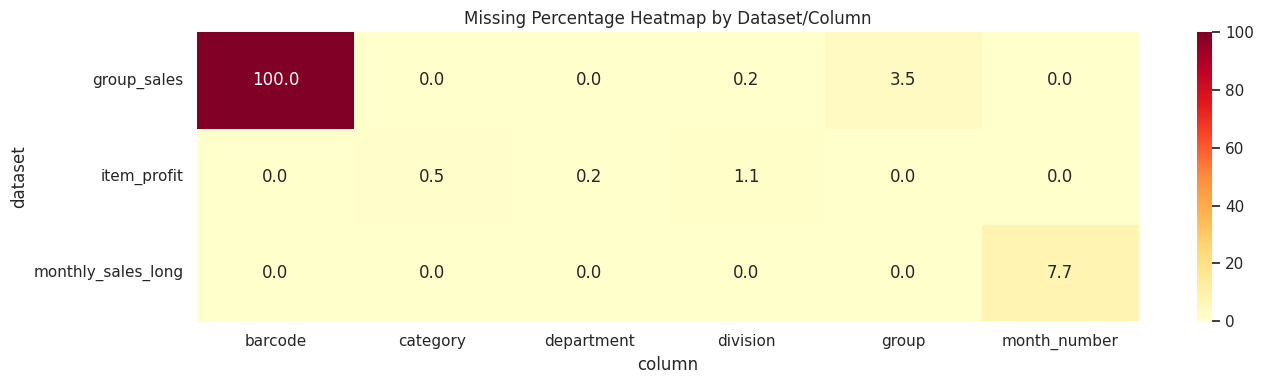

In [8]:
missing_tables = []
for name, df in datasets.items():
    miss = df.isna().sum().sort_values(ascending=False)
    miss = miss[miss > 0]
    if miss.empty:
        continue
    temp = pd.DataFrame({
        'dataset': name,
        'column': miss.index,
        'missing_count': miss.values,
        'missing_pct': (miss.values / len(df) * 100).round(2)
    })
    missing_tables.append(temp)

if missing_tables:
    missing_summary = pd.concat(missing_tables, ignore_index=True)
    display(missing_summary)

    pivot = missing_summary.pivot(index='dataset', columns='column', values='missing_pct').fillna(0)
    plt.figure(figsize=(14, 4))
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('Missing Percentage Heatmap by Dataset/Column')
    plt.tight_layout()
    plt.show()
else:
    print('No missing values detected.')


In [36]:
# Missing-value cleanup (simple + readable)

# Work on copies (optional, keeps original raw dfs intact)
df_item = df_item.copy()
df_group = df_group.copy()
df_month_long = df_month_long.copy()

# 1) Drop barcode from group_sales (100% missing)
df_group = df_group.drop(columns=["barcode"], errors="ignore")

# 2) Remove rows requested:
#    - group_sales: rows missing division
#    - item_profit: rows missing department or category
df_group = df_group.dropna(subset=["division"]).reset_index(drop=True)
df_item = df_item.dropna(subset=["department", "category"]).reset_index(drop=True)

# 3) Handle remaining missing values where possible
# item_profit -> fill division by branch context, then fallback
df_item["division"] = (
    df_item.groupby("branch")["division"].ffill().bfill().fillna("UNKNOWN")
)

# group_sales -> fill group by branch context, then fallback
df_group["group"] = (
    df_group.groupby("branch")["group"].ffill().bfill().fillna("UNKNOWN")
)

# monthly_sales_long -> fix month_number
month_map = {
    "january": 1, "february": 2, "march": 3, "april": 4, "may": 5, "june": 6,
    "july": 7, "august": 8, "september": 9, "october": 10, "november": 11, "december": 12
}
df_month_long["period"] = df_month_long["period"].astype(str).str.lower().str.strip()

is_month = df_month_long["period_type"].eq("month")
is_year_total = df_month_long["period_type"].eq("year_total")

df_month_long.loc[is_month, "month_number"] = df_month_long.loc[is_month, "period"].map(month_map)
df_month_long.loc[is_year_total, "month_number"] = 13  # code for yearly total
df_month_long["month_number"] = pd.to_numeric(df_month_long["month_number"], errors="coerce").astype("Int64")

# 4) Quick check
print("Remaining missing values:")
print("\nitem_profit:")
display(df_item[["department", "category", "division"]].isna().sum().to_frame("missing_count"))

print("\ngroup_sales:")
display(df_group[["division", "group"]].isna().sum().to_frame("missing_count"))

print("\nmonthly_sales_long:")
display(df_month_long[["month_number"]].isna().sum().to_frame("missing_count"))


Remaining missing values:

item_profit:


,missing_count
department,0
category,0
division,0



group_sales:


,missing_count
division,0
group,0



monthly_sales_long:


,missing_count
month_number,0


In [40]:
# Refresh dataset mapping to point to cleaned dataframes
datasets = {
    'item_profit': df_item,
    'group_sales': df_group,
    'category_profit': df_cat,
    'monthly_sales_wide': df_month_wide,
    'monthly_sales_long': df_month_long
}

print("Datasets remapped to cleaned frames.")
for k, v in datasets.items():
    print(f"{k}: {v.shape}")


Datasets remapped to cleaned frames.
item_profit: (13076, 13)
group_sales: (12236, 8)
category_profit: (75, 10)
monthly_sales_wide: (50, 17)
monthly_sales_long: (650, 8)


In [41]:
missing_tables = []
for name, df in datasets.items():
    miss = df.isna().sum().sort_values(ascending=False)
    miss = miss[miss > 0]
    if miss.empty:
        continue
    temp = pd.DataFrame({
        'dataset': name,
        'column': miss.index,
        'missing_count': miss.values,
        'missing_pct': (miss.values / len(df) * 100).round(2)
    })
    missing_tables.append(temp)

if missing_tables:
    missing_summary = pd.concat(missing_tables, ignore_index=True)
    display(missing_summary)

    pivot = missing_summary.pivot(index='dataset', columns='column', values='missing_pct').fillna(0)
    plt.figure(figsize=(14, 4))
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('Missing Percentage Heatmap by Dataset/Column')
    plt.tight_layout()
    plt.show()
else:
    print('No missing values detected.')


No missing values detected.


### **Summary Statistics**



In [9]:
def numeric_summary(name, df):
    num_df = df.select_dtypes(include='number')
    if num_df.empty:
        return
    print(f'\n{name} numeric summary')
    display(num_df.describe().T)

for name, df in datasets.items():
    numeric_summary(name, df)



item_profit numeric summary


,count,mean,std,min,25%,50%,75%,max
qty,13143.0,2487.763518,2.347516e+04,-6.00,12.00,84.00,412.950,803914.80
total_price,13143.0,116816.060653,4.389580e+05,-1200.00,1000.00,9459.46,55266.985,6489116.67
total_cost,13143.0,92151.672775,8.621053e+05,-3996.09,518.53,3500.03,18174.095,30826758.47
total_cost_pct,13143.0,33.432317,1.983072e+02,0.00,18.89,25.48,34.780,16719.04
total_profit,13143.0,227584.530132,2.145991e+06,-1040870.08,641.81,6488.56,37519.195,77771419.01
total_profit_pct,13143.0,66.570349,1.983076e+02,-16619.04,65.22,74.52,81.110,100.00



group_sales numeric summary


,count,mean,std,min,25%,50%,75%,max
barcode,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qty,12261.0,2162.588556,1.796284e+04,0.0,18.00,119.00,565.00,8.141636e+05
total_amount,12261.0,278366.901790,2.274934e+06,0.0,1466.67,13921.92,78826.13,1.107934e+08



category_profit numeric summary


,count,mean,std,min,25%,50%,75%,max
qty,75.0,1.743823e+05,1.620075e+05,1162.50,69427.850,131814.10,2.250618e+05,803914.80
total_price,75.0,2.460102e+06,1.577002e+06,130393.39,1289682.030,2054988.70,3.234245e+06,6604123.80
total_cost,75.0,6.459464e+06,6.065164e+06,46184.66,2625228.430,4717079.19,8.193548e+06,30826758.47
total_cost_pct,75.0,2.939613e+01,5.966507e+00,20.69,23.295,29.10,3.575500e+01,39.65
total_profit,75.0,1.595277e+07,1.522515e+07,84208.73,5970078.420,11077673.10,2.068211e+07,77771419.01
total_profit_pct,75.0,7.060387e+01,5.966507e+00,60.35,64.245,70.90,7.670500e+01,79.31



monthly_sales_wide numeric summary


,count,mean,std,min,25%,50%,75%,max
year,50.0,2.025480e+03,5.046720e-01,2025.00,2.025000e+03,2025.00,2.026000e+03,2.026000e+03
january,50.0,5.195825e+06,1.261508e+07,0.00,8.101207e+05,2334584.99,4.120704e+06,6.736994e+07
february,50.0,2.290481e+06,8.238728e+06,0.00,0.000000e+00,0.00,1.854778e+06,5.726202e+07
march,50.0,2.575477e+06,9.264409e+06,0.00,0.000000e+00,0.00,2.128753e+06,6.438693e+07
april,50.0,3.251423e+06,1.166325e+07,0.00,0.000000e+00,0.00,3.133464e+06,8.128557e+07
may,50.0,1.780218e+06,6.390062e+06,0.00,0.000000e+00,0.00,1.768205e+06,4.450544e+07
june,50.0,7.374954e+05,2.648390e+06,0.00,0.000000e+00,0.00,6.591704e+05,1.843739e+07
july,50.0,3.585190e+06,1.278593e+07,0.00,0.000000e+00,0.00,3.704254e+06,8.962976e+07
august,50.0,4.377012e+06,1.553746e+07,0.00,0.000000e+00,0.00,5.166453e+06,1.094253e+08
september,50.0,3.672832e+06,1.305028e+07,0.00,0.000000e+00,0.00,3.791581e+06,9.182079e+07



monthly_sales_long numeric summary


,count,mean,std,min,25%,50%,75%,max
year,650.0,2.025480e+03,4.999846e-01,2025.0,2025.00,2025.0,2026.000,2.026000e+03
month_number,600.0,6.500000e+00,3.454933e+00,1.0,3.75,6.5,9.250,1.200000e+01
sales_amount,650.0,6.049853e+06,3.871781e+07,0.0,0.00,0.0,3493518.325,9.205754e+08


### **Skewness**

,dataset,feature,skewness
3,item_profit,total_cost_pct,62.290659
5,item_profit,total_profit_pct,-62.290393
7,group_sales,total_amount,26.643114
6,group_sales,qty,25.205082
30,monthly_sales_long,sales_amount,20.626826
2,item_profit,total_cost,19.955196
4,item_profit,total_profit,19.626670
0,item_profit,qty,19.273683
1,item_profit,total_price,8.108678
26,monthly_sales_wide,december,6.674479


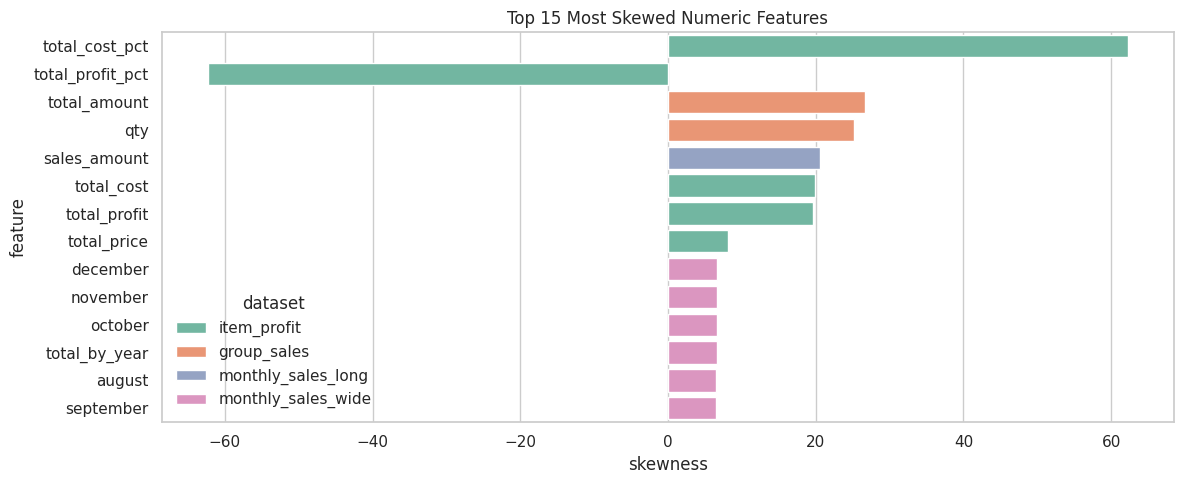

In [10]:
skew_rows = []
for name, df in datasets.items():
    num_df = df.select_dtypes(include='number')
    if num_df.empty:
        continue
    sk = num_df.skew(numeric_only=True).dropna()
    for col, val in sk.items():
        skew_rows.append({'dataset': name, 'feature': col, 'skewness': val})

skew_df = pd.DataFrame(skew_rows)
display(skew_df.sort_values('skewness', key=np.abs, ascending=False).head(20))

plt.figure(figsize=(12, 5))
top_skew = skew_df.sort_values('skewness', key=np.abs, ascending=False).head(15)
sns.barplot(data=top_skew, x='skewness', y='feature', hue='dataset', dodge=False)
plt.title('Top 15 Most Skewed Numeric Features')
plt.tight_layout()
plt.show()


### **Outlier Detection**

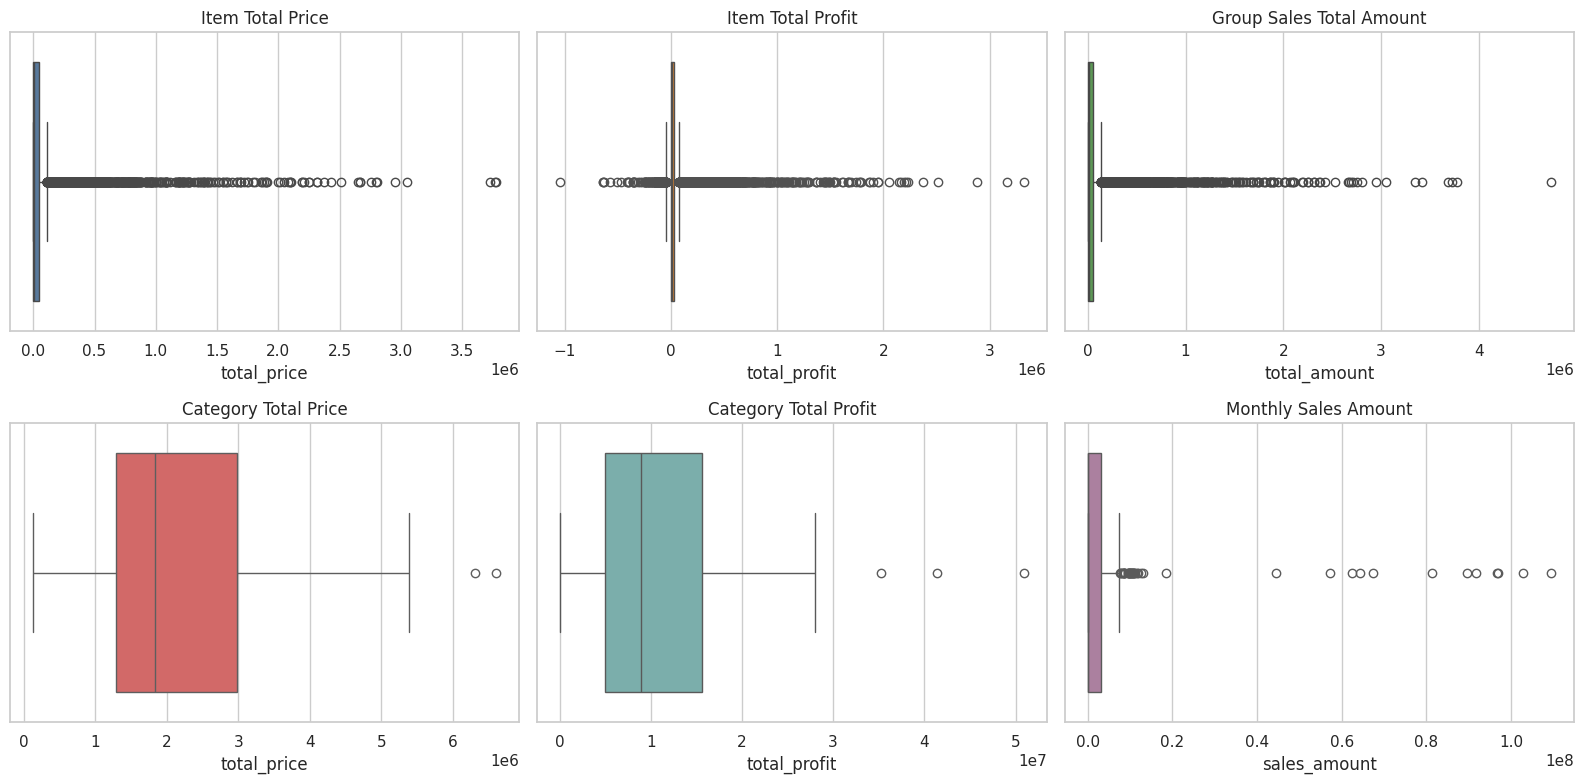

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

sns.boxplot(data=df_item[df_item['row_type']=='item'], x='total_price', ax=axes[0], color='#4C78A8')
axes[0].set_title('Item Total Price')

sns.boxplot(data=df_item[df_item['row_type']=='item'], x='total_profit', ax=axes[1], color='#F58518')
axes[1].set_title('Item Total Profit')

sns.boxplot(data=df_group[df_group['row_type']=='item'], x='total_amount', ax=axes[2], color='#54A24B')
axes[2].set_title('Group Sales Total Amount')

sns.boxplot(data=df_cat[df_cat['row_type']=='category'], x='total_price', ax=axes[3], color='#E45756')
axes[3].set_title('Category Total Price')

sns.boxplot(data=df_cat[df_cat['row_type']=='category'], x='total_profit', ax=axes[4], color='#72B7B2')
axes[4].set_title('Category Total Profit')

sns.boxplot(data=df_month_long[df_month_long['period_type']=='month'], x='sales_amount', ax=axes[5], color='#B279A2')
axes[5].set_title('Monthly Sales Amount')

plt.tight_layout()
plt.show()


## **Visualization Analysis**

### **Distribution of Features**

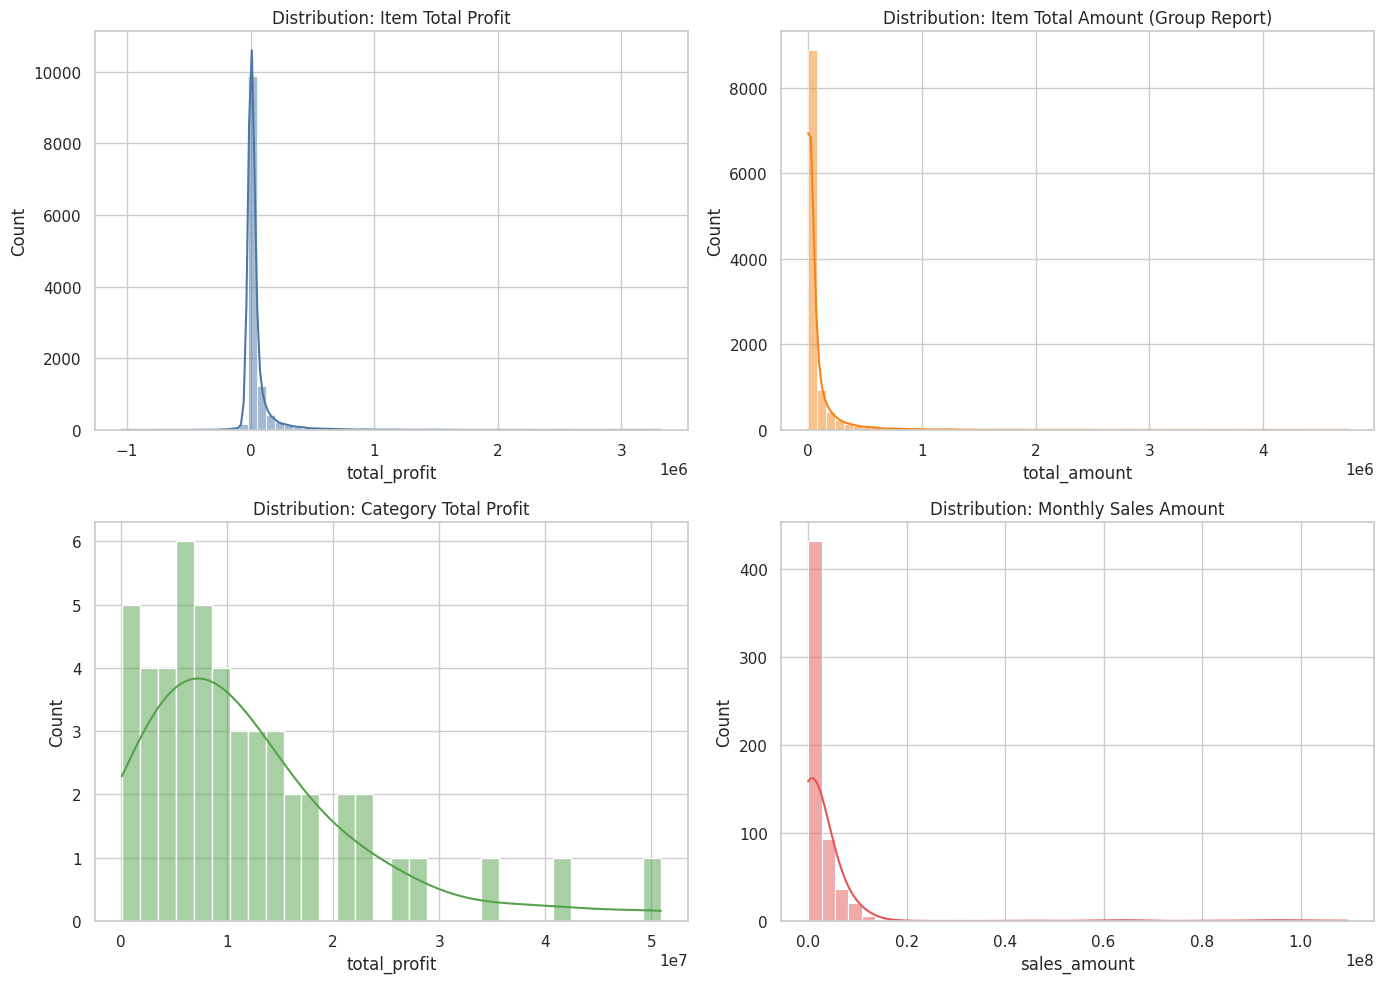

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_item[df_item['row_type']=='item']['total_profit'].dropna(), bins=60, kde=True, ax=axes[0, 0], color='#4C78A8')
axes[0, 0].set_title('Distribution: Item Total Profit')

sns.histplot(df_group[df_group['row_type']=='item']['total_amount'].dropna(), bins=60, kde=True, ax=axes[0, 1], color='#F58518')
axes[0, 1].set_title('Distribution: Item Total Amount (Group Report)')

sns.histplot(df_cat[df_cat['row_type']=='category']['total_profit'].dropna(), bins=30, kde=True, ax=axes[1, 0], color='#54A24B')
axes[1, 0].set_title('Distribution: Category Total Profit')

sns.histplot(df_month_long[df_month_long['period_type']=='month']['sales_amount'].dropna(), bins=40, kde=True, ax=axes[1, 1], color='#E45756')
axes[1, 1].set_title('Distribution: Monthly Sales Amount')

plt.tight_layout()
plt.show()


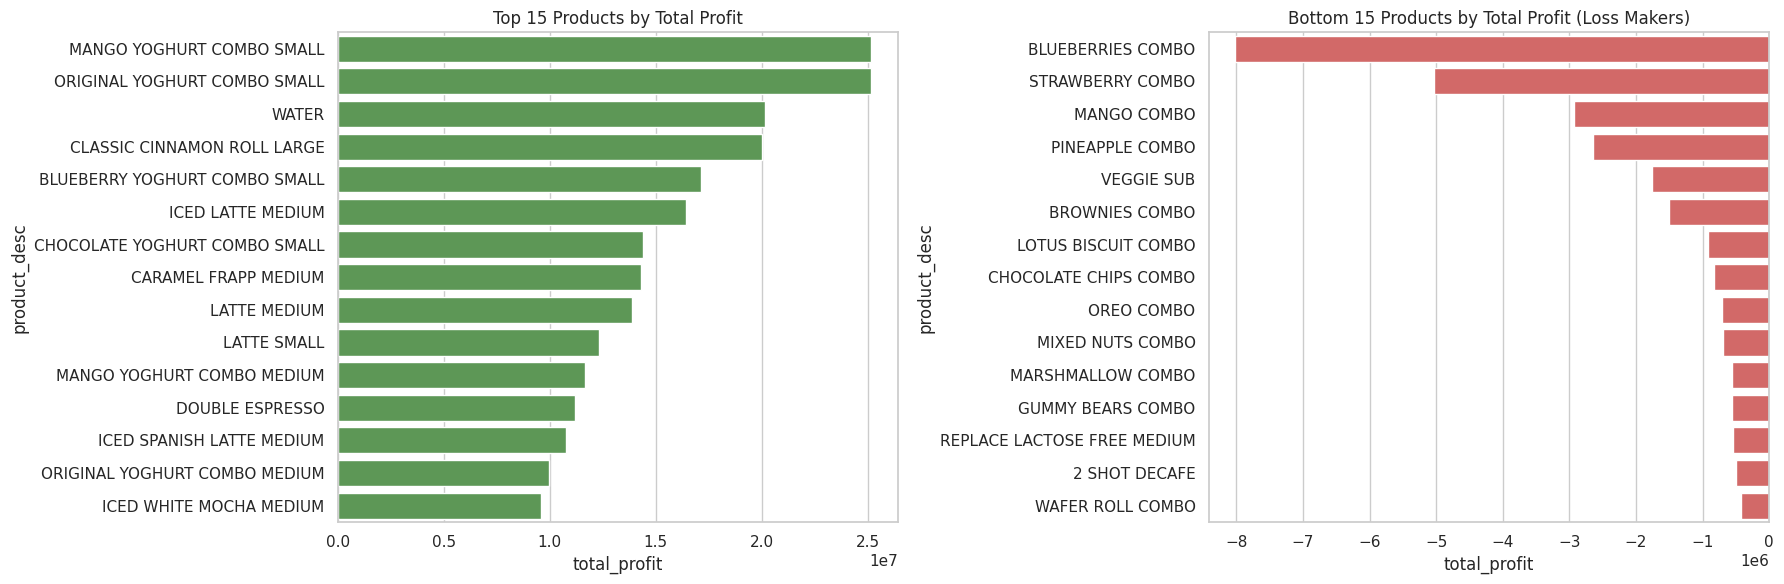

In [13]:
# Top and bottom products by profitability
item_only = df_item[df_item['row_type']=='item'].copy()

best_products = item_only.groupby('product_desc', as_index=False)['total_profit'].sum().nlargest(15, 'total_profit')
worst_products = item_only.groupby('product_desc', as_index=False)['total_profit'].sum().nsmallest(15, 'total_profit')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=best_products, x='total_profit', y='product_desc', ax=axes[0], color='#54A24B')
axes[0].set_title('Top 15 Products by Total Profit')

sns.barplot(data=worst_products, x='total_profit', y='product_desc', ax=axes[1], color='#E45756')
axes[1].set_title('Bottom 15 Products by Total Profit (Loss Makers)')

plt.tight_layout()
plt.show()


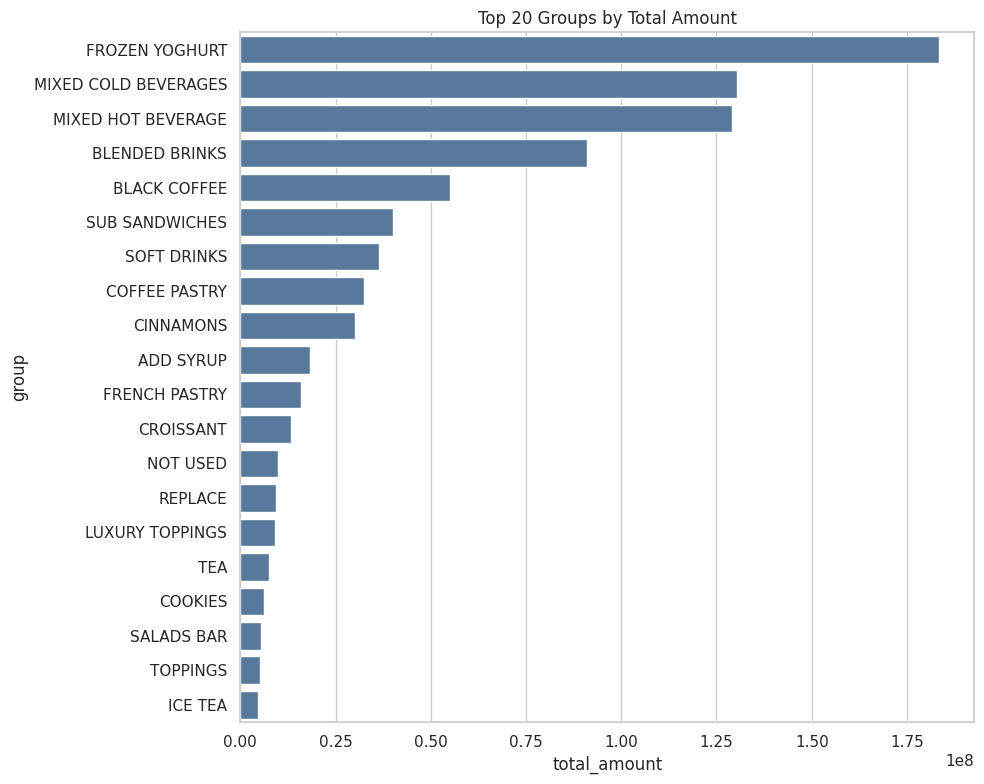

In [14]:
# Top groups by sales amount
group_totals = df_group[df_group['row_type']=='group_total'].copy()

top_groups = group_totals.groupby('group', as_index=False)['total_amount'].sum().nlargest(20, 'total_amount')

plt.figure(figsize=(10, 8))
sns.barplot(data=top_groups, x='total_amount', y='group', color='#4C78A8')
plt.title('Top 20 Groups by Total Amount')
plt.tight_layout()
plt.show()


,branch,item_total_price,item_total_profit,group_total_amount,cat_total_price,cat_total_profit
0,Stories - Bir Hasan,3106351.84,22261437.45,3.160286e+07,3106351.84,22261437.45
1,Stories Ain El Mreisseh,1085981.77,77771419.01,1.107934e+08,1085981.77,77771419.01
2,Stories Airport,3646650.04,26205643.82,3.648742e+07,3646650.04,26205643.82
3,Stories Antelias,2855048.77,20005039.62,2.878889e+07,2855048.77,20005039.62
4,Stories Batroun,4871738.75,34641641.72,4.935327e+07,4871738.75,34641641.72


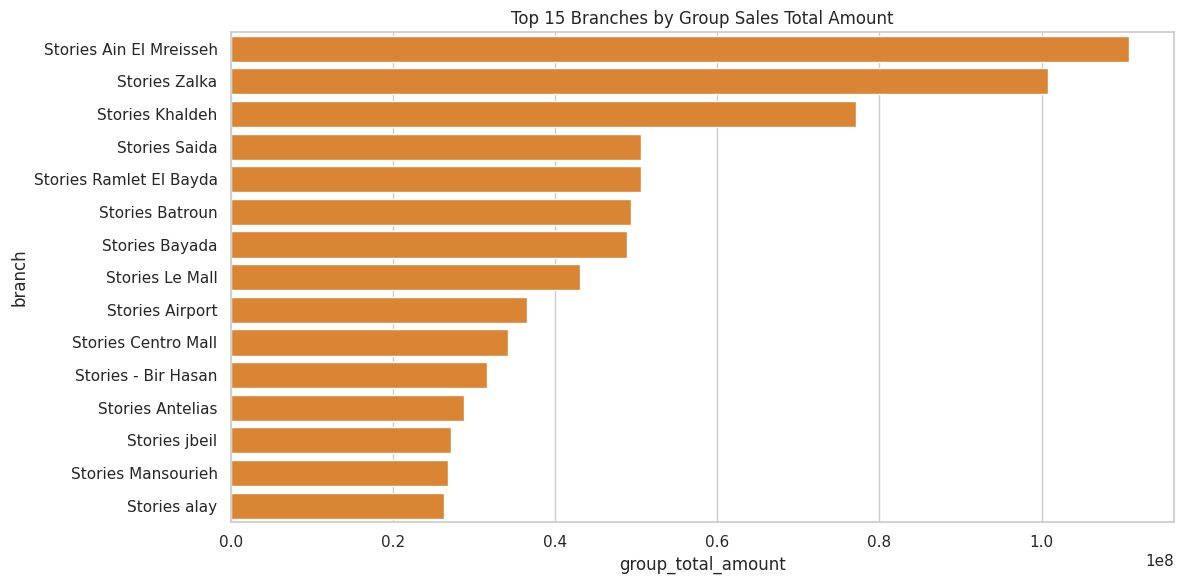

In [15]:
# Branch-level totals from three reports
item_branch = df_item[df_item['row_type']=='branch_total'][['branch', 'total_price', 'total_profit']].rename(columns={'total_price': 'item_total_price', 'total_profit': 'item_total_profit'})
group_branch = df_group[df_group['row_type']=='branch_total'][['branch', 'total_amount']].rename(columns={'total_amount': 'group_total_amount'})
cat_branch = df_cat[df_cat['row_type']=='branch_total'][['branch', 'total_price', 'total_profit']].rename(columns={'total_price': 'cat_total_price', 'total_profit': 'cat_total_profit'})

branch_compare = item_branch.merge(group_branch, on='branch', how='outer').merge(cat_branch, on='branch', how='outer')
display(branch_compare.head())

plot_df = branch_compare.sort_values('group_total_amount', ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='group_total_amount', y='branch', color='#F58518')
plt.title('Top 15 Branches by Group Sales Total Amount')
plt.tight_layout()
plt.show()


### **Feature Interactions**

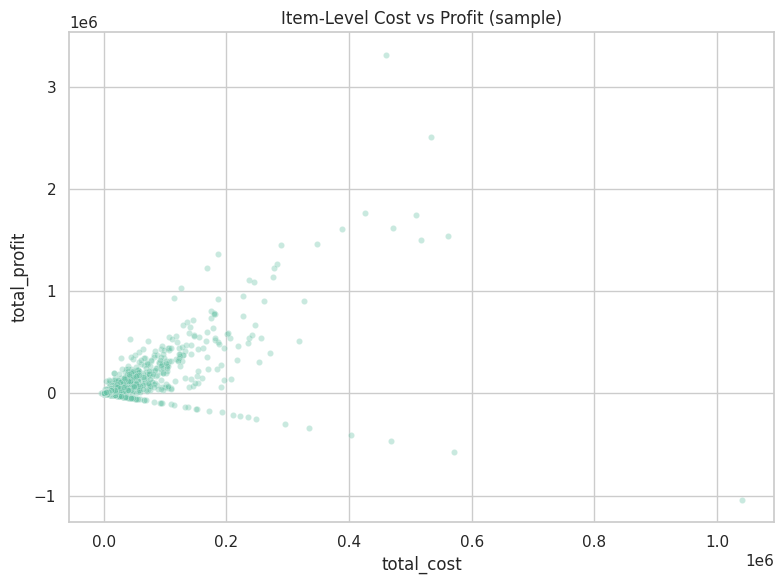

In [16]:
sample_item = df_item[df_item['row_type']=='item'].dropna(subset=['total_cost', 'total_profit']).sample(min(3000, len(df_item[df_item['row_type']=='item'])), random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_item, x='total_cost', y='total_profit', alpha=0.35, s=20)
plt.title('Item-Level Cost vs Profit (sample)')
plt.tight_layout()
plt.show()


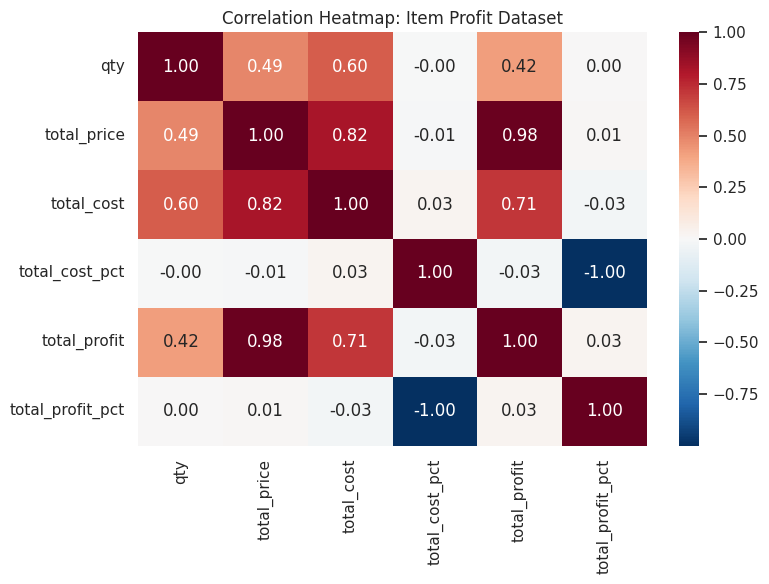

In [17]:
num_cols_item = ['qty', 'total_price', 'total_cost', 'total_cost_pct', 'total_profit', 'total_profit_pct']
item_corr = df_item[df_item['row_type']=='item'][num_cols_item].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(item_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap: Item Profit Dataset')
plt.tight_layout()
plt.show()


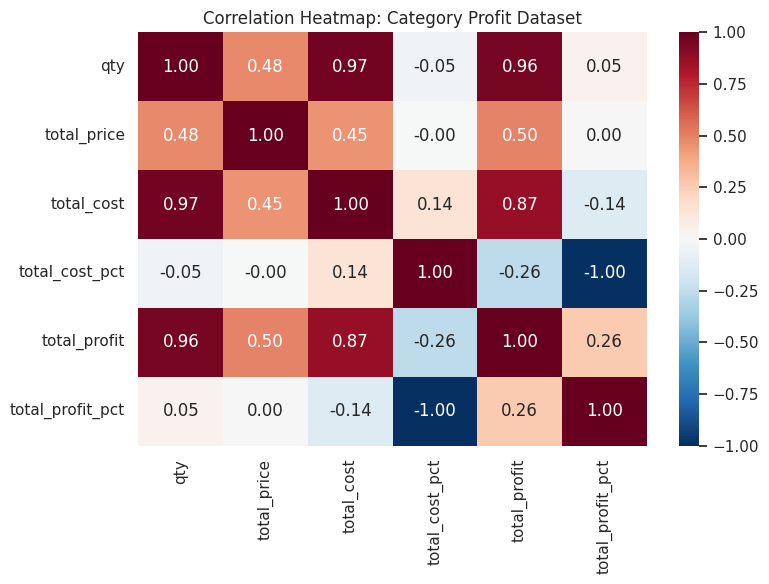

In [18]:
num_cols_cat = ['qty', 'total_price', 'total_cost', 'total_cost_pct', 'total_profit', 'total_profit_pct']
cat_corr = df_cat[df_cat['row_type']=='category'][num_cols_cat].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(cat_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap: Category Profit Dataset')
plt.tight_layout()
plt.show()


### **Relationships between features and business outputs**

,branch,total_price,total_profit,profit_margin_pct
17,Stories Ain El Mreisseh,1085981.77,77771419.01,7161.392682
26,Stories Zalka,983324.93,69324229.68,7049.981910
35,Stories Khaldeh,755778.29,53571236.50,7088.221137
50,Stories Ramlet El Bayda,4988967.06,36073449.84,723.064502
47,Stories Saida,4964663.04,35001069.52,705.003930
44,Stories Batroun,4871738.75,34641641.72,711.073469
38,Stories Bayada,4791107.54,34030573.38,710.286152
41,Stories Le Mall,4249180.51,29889305.74,703.413415
56,Stories Airport,3646650.04,26205643.82,718.622394
5,Stories Centro Mall,3362138.44,24047788.90,715.252787


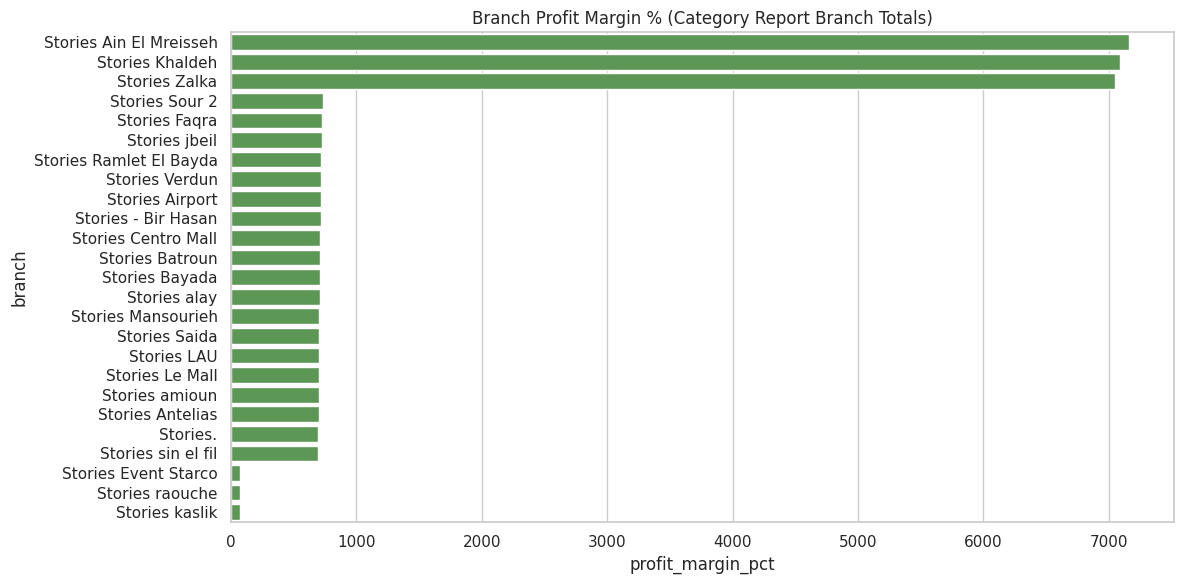

In [19]:
# Branch profitability and margin
cat_branch_totals = df_cat[df_cat['row_type']=='branch_total'].copy()
cat_branch_totals['profit_margin_pct'] = (cat_branch_totals['total_profit'] / cat_branch_totals['total_price']) * 100
cat_branch_totals = cat_branch_totals.replace([np.inf, -np.inf], np.nan)

display(cat_branch_totals[['branch', 'total_price', 'total_profit', 'profit_margin_pct']].sort_values('total_profit', ascending=False).head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=cat_branch_totals.sort_values('profit_margin_pct', ascending=False), x='profit_margin_pct', y='branch', color='#54A24B')
plt.title('Branch Profit Margin % (Category Report Branch Totals)')
plt.tight_layout()
plt.show()


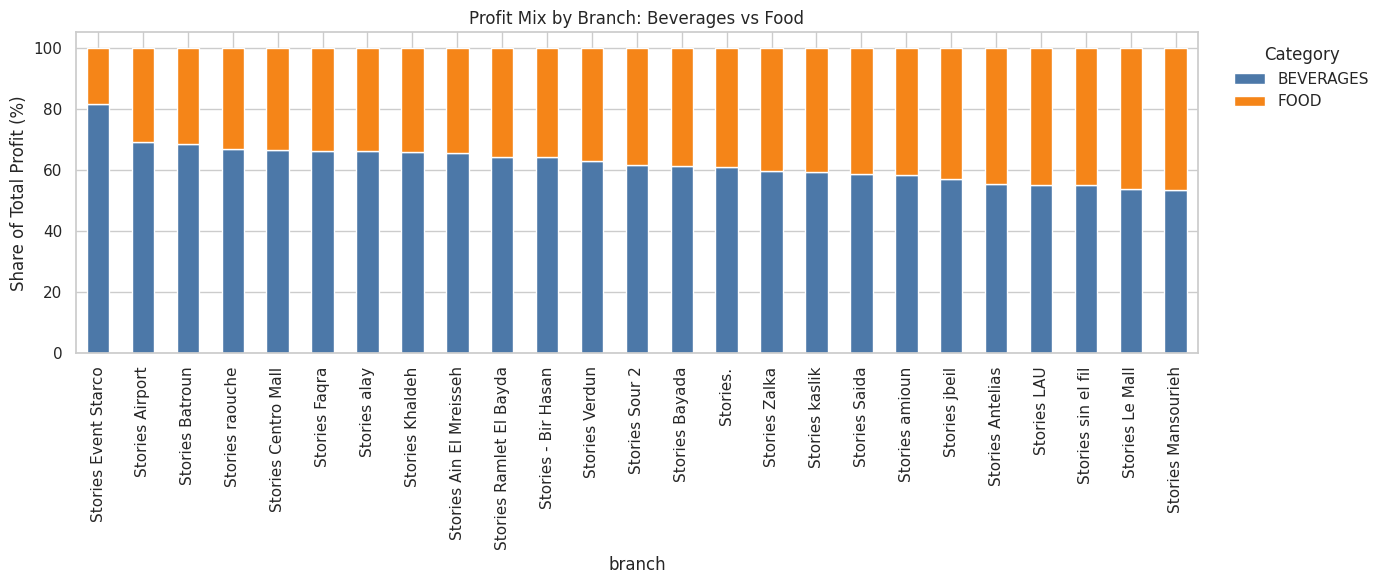

In [20]:
# Beverage vs food share per branch
cat_detail = df_cat[df_cat['row_type']=='category'].copy()
pivot_cat = cat_detail.pivot_table(index='branch', columns='category', values='total_profit', aggfunc='sum').fillna(0)

if {'BEVERAGES', 'FOOD'}.issubset(pivot_cat.columns):
    mix = pivot_cat[['BEVERAGES', 'FOOD']].copy()
    mix_pct = mix.div(mix.sum(axis=1), axis=0) * 100
    mix_pct = mix_pct.sort_values('BEVERAGES', ascending=False)

    ax = mix_pct.plot(kind='bar', stacked=True, figsize=(14, 6), color=['#4C78A8', '#F58518'])
    ax.set_ylabel('Share of Total Profit (%)')
    ax.set_title('Profit Mix by Branch: Beverages vs Food')
    plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print('Expected BEVERAGES and FOOD categories not found.')


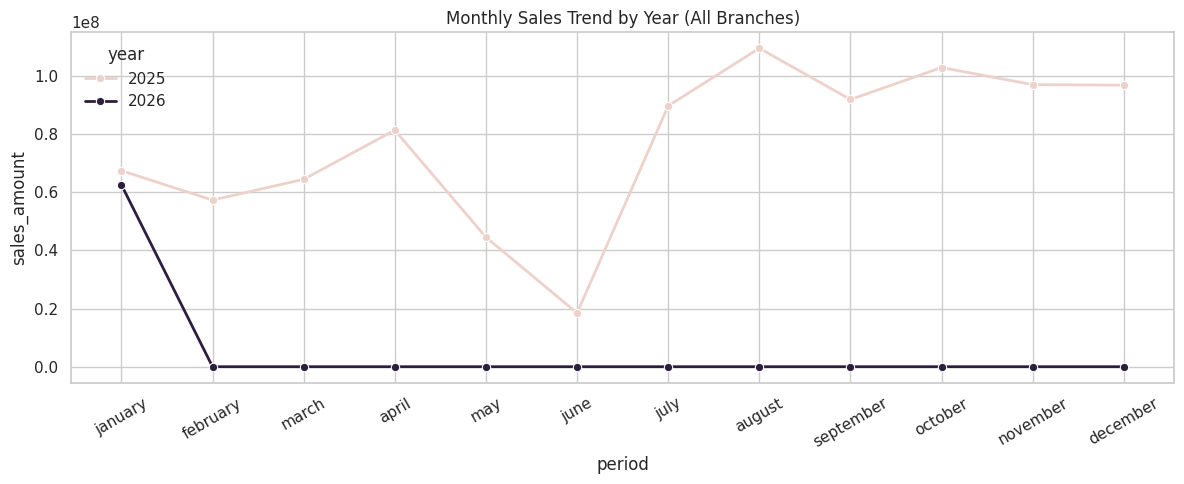

In [21]:
# Monthly trend by year using long table
month_order = ['january','february','march','april','may','june','july','august','september','october','november','december']

month_df = df_month_long[(df_month_long['row_type']=='branch') & (df_month_long['period_type']=='month')].copy()
month_df['period'] = pd.Categorical(month_df['period'], categories=month_order, ordered=True)

year_month_totals = month_df.groupby(['year', 'period'], as_index=False)['sales_amount'].sum().sort_values(['year','period'])

plt.figure(figsize=(12, 5))
sns.lineplot(data=year_month_totals, x='period', y='sales_amount', hue='year', marker='o', linewidth=2)
plt.title('Monthly Sales Trend by Year (All Branches)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


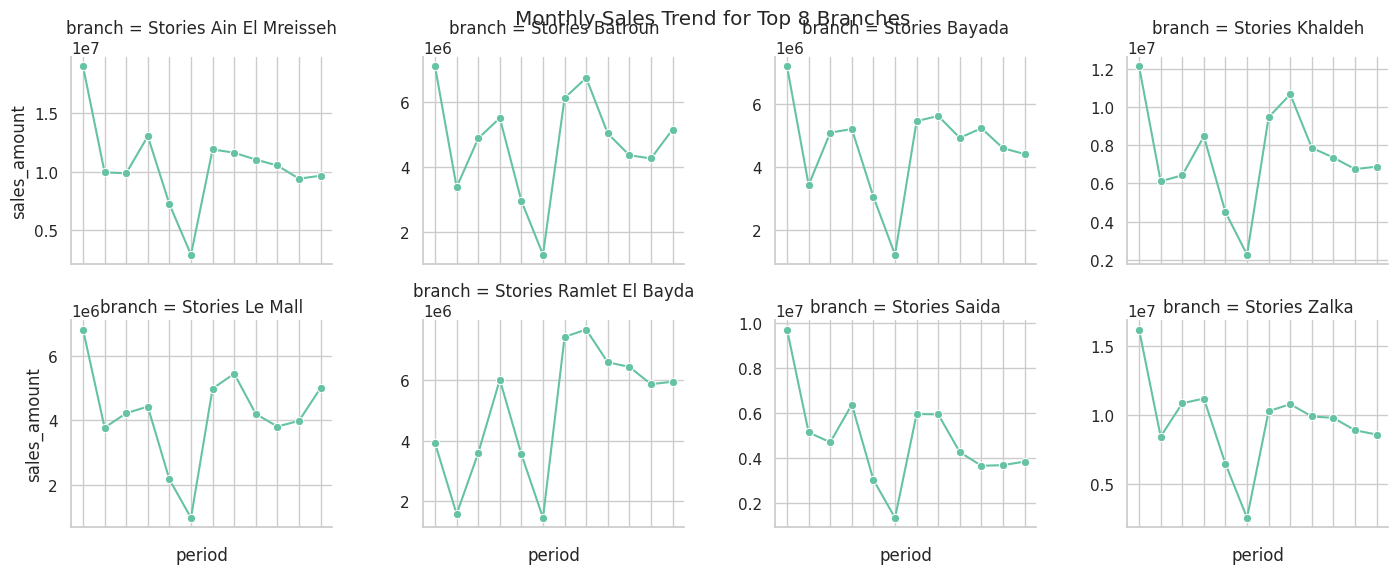

In [22]:
# Top branches monthly trend (based on total annual sales)
branch_totals = month_df.groupby('branch', as_index=False)['sales_amount'].sum().nlargest(8, 'sales_amount')
top_branches = branch_totals['branch'].tolist()

top_month_df = month_df[month_df['branch'].isin(top_branches)].copy()
top_month_df = top_month_df.groupby(['branch', 'period'], as_index=False)['sales_amount'].sum()

g = sns.relplot(
    data=top_month_df,
    x='period', y='sales_amount',
    col='branch', col_wrap=4,
    kind='line', marker='o',
    height=3, aspect=1.2,
    facet_kws={'sharey': False}
)
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Monthly Sales Trend for Top 8 Branches')
plt.show()


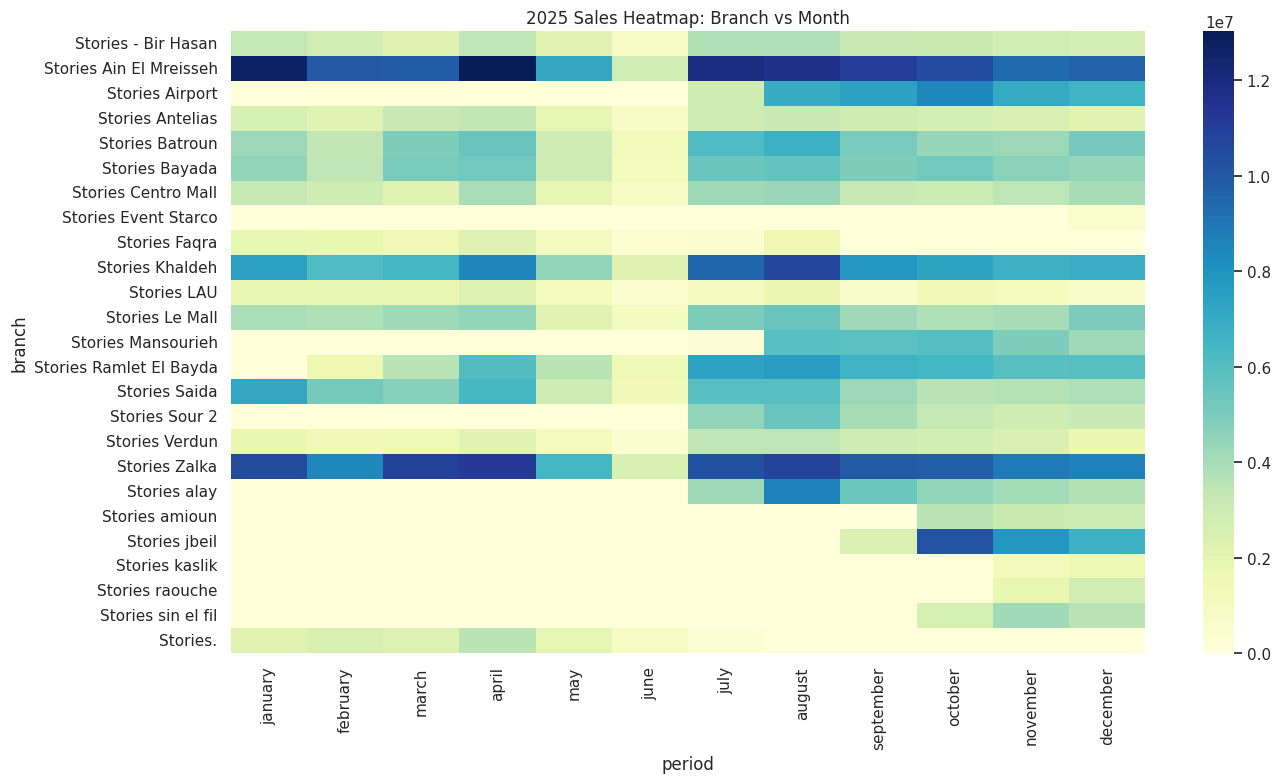

In [23]:
# Branch x month heatmap for 2025
heat_2025 = month_df[month_df['year']==2025].pivot_table(index='branch', columns='period', values='sales_amount', aggfunc='sum').reindex(columns=month_order)

plt.figure(figsize=(14, 8))
sns.heatmap(heat_2025, cmap='YlGnBu')
plt.title('2025 Sales Heatmap: Branch vs Month')
plt.tight_layout()
plt.show()


year,branch,2025,2026,change_pct
11,Stories Le Mall,3881015.00,2941828.23,-24.199514
6,Stories Centro Mall,3264533.33,2236126.13,-31.502426
4,Stories Batroun,4266517.33,2839402.11,-33.449184
9,Stories Khaldeh,7468155.33,4657413.53,-37.636360
16,Stories Verdun,1747977.87,1069784.99,-38.798711
5,Stories Bayada,4497376.67,2688382.59,-40.223317
17,Stories Zalka,10449006.67,5752503.31,-44.946888
3,Stories Antelias,2615854.33,1429394.60,-45.356491
0,Stories - Bir Hasan,3355705.33,1792619.23,-46.579957
1,Stories Ain El Mreisseh,12648546.67,6348294.91,-49.810084


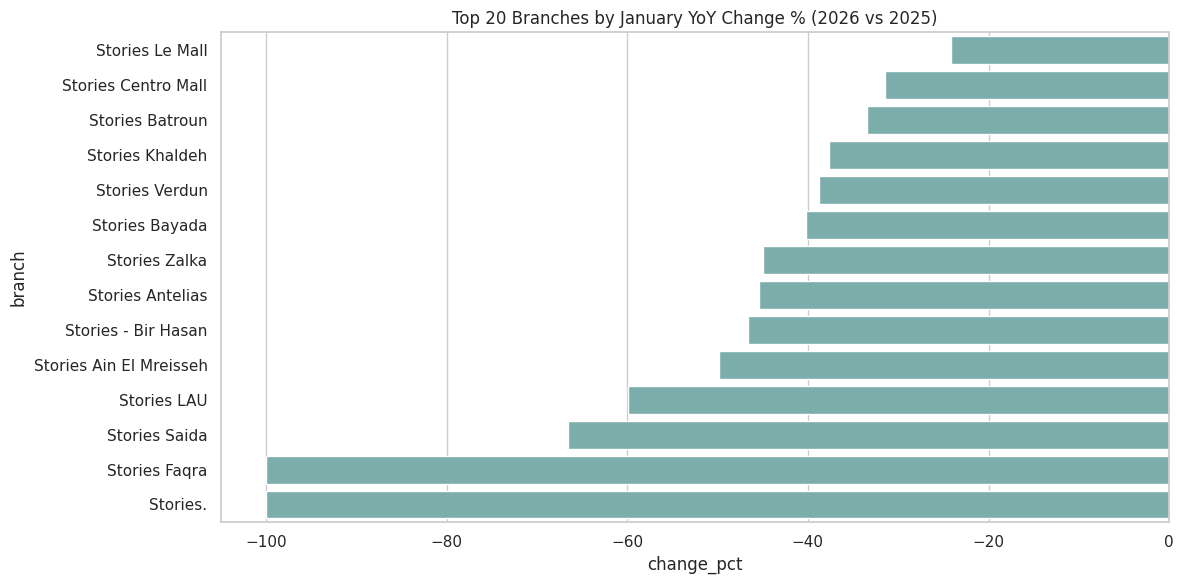

In [24]:
# 2025 vs 2026 January comparison at branch level
jan = month_df[month_df['period']=='january'].copy()
jan_pivot = jan.pivot_table(index='branch', columns='year', values='sales_amount', aggfunc='sum').fillna(0)
if 2025 in jan_pivot.columns and 2026 in jan_pivot.columns:
    jan_pivot['change_pct'] = np.where(jan_pivot[2025]==0, np.nan, (jan_pivot[2026]-jan_pivot[2025]) / jan_pivot[2025] * 100)
    jan_cmp = jan_pivot.reset_index().sort_values('change_pct', ascending=False)
    display(jan_cmp.head(15))

    plt.figure(figsize=(12, 6))
    sns.barplot(data=jan_cmp.dropna(subset=['change_pct']).head(20), x='change_pct', y='branch', color='#72B7B2')
    plt.title('Top 20 Branches by January YoY Change % (2026 vs 2025)')
    plt.tight_layout()
    plt.show()
else:
    print('January comparison needs both 2025 and 2026 columns.')


## **Cross-Report Consistency Checks**

,branch,item_branch_total_price,cat_branch_total_price,abs_diff,pct_diff
0,Stories - Bir Hasan,3106351.84,3106351.84,0.0,0.0
1,Stories Centro Mall,3362138.44,3362138.44,0.0,0.0
2,Stories LAU,1544717.87,1544717.87,0.0,0.0
3,Stories Faqra,1091839.75,1091839.75,0.0,0.0
4,Stories.,1413464.67,1413464.67,0.0,0.0
5,Stories Ain El Mreisseh,1085981.77,1085981.77,0.0,0.0
6,Stories Sour 2,1885648.61,1885648.61,0.0,0.0
7,Stories Event Starco,597132.13,597132.13,0.0,0.0
8,Stories Zalka,983324.93,983324.93,0.0,0.0
9,Stories Antelias,2855048.77,2855048.77,0.0,0.0


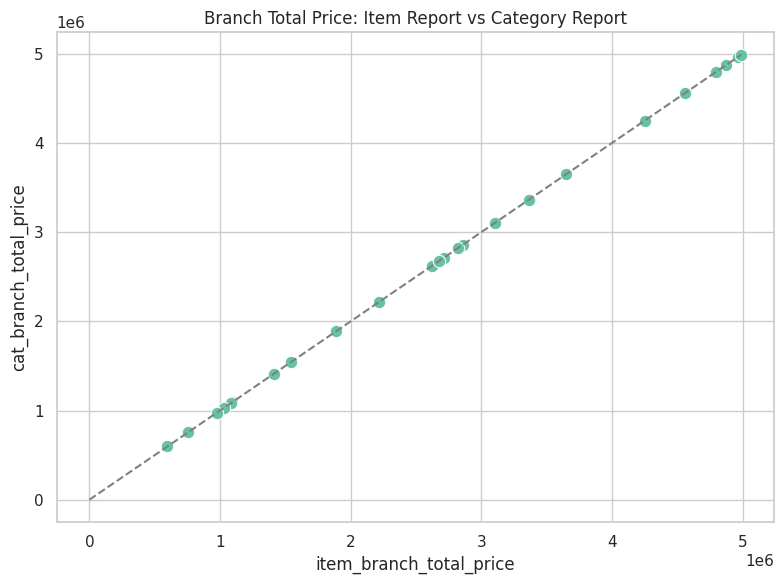

In [25]:
# Compare branch total_price from item report vs category report
item_total = df_item[df_item['row_type']=='branch_total'][['branch', 'total_price']].rename(columns={'total_price': 'item_branch_total_price'})
cat_total = df_cat[df_cat['row_type']=='branch_total'][['branch', 'total_price']].rename(columns={'total_price': 'cat_branch_total_price'})

consistency = item_total.merge(cat_total, on='branch', how='inner')
consistency['abs_diff'] = (consistency['item_branch_total_price'] - consistency['cat_branch_total_price']).abs()
consistency['pct_diff'] = np.where(consistency['item_branch_total_price']==0, np.nan, consistency['abs_diff']/consistency['item_branch_total_price']*100)

consistency = consistency.sort_values('abs_diff', ascending=False)
display(consistency.head(15))

plt.figure(figsize=(8, 6))
sns.scatterplot(data=consistency, x='item_branch_total_price', y='cat_branch_total_price', s=80)
max_val = np.nanmax([consistency['item_branch_total_price'].max(), consistency['cat_branch_total_price'].max()])
plt.plot([0, max_val], [0, max_val], '--', color='gray')
plt.title('Branch Total Price: Item Report vs Category Report')
plt.tight_layout()
plt.show()


## **Interactive Visualizations (Plotly)**

In [26]:
# Interactive: top branches by annual sales
if HAS_PLOTLY:
    branch_year_sales = month_df.groupby(['year', 'branch'], as_index=False)['sales_amount'].sum()
    fig = px.bar(
        branch_year_sales.sort_values('sales_amount', ascending=False),
        x='branch', y='sales_amount', color='year',
        title='Branch Annual Sales by Year',
        barmode='group',
        height=500
    )
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
else:
    print('Skipping interactive chart: Plotly not available.')


In [31]:
# Interactive: item profit vs cost bubble chart
if HAS_PLOTLY:
    bubble_df = df_item[df_item['row_type']=='item'].dropna(subset=['total_cost', 'total_profit', 'qty']).copy()
    bubble_df = bubble_df.nlargest(2500, 'total_price')

    fig = px.scatter(
        bubble_df,
        x='total_cost', y='total_profit',
        size='qty', color='branch',
        hover_data=['product_desc', 'category', 'division'],
        title='Item Cost vs Profit (bubble size = qty)',
        height=600
    )
    fig.show()
else:
    print('Skipping interactive chart: Plotly not available.')


## **Key Insights (Auto-generated)**

In [32]:
insights = []

# 1) Top branch by sales
branch_sales = month_df.groupby('branch', as_index=False)['sales_amount'].sum().sort_values('sales_amount', ascending=False)
if not branch_sales.empty:
    insights.append(f"Top branch by monthly-sales dataset total: **{branch_sales.iloc[0]['branch']}** ({branch_sales.iloc[0]['sales_amount']:,.2f}).")

# 2) Most profitable item
top_item = item_only.groupby('product_desc', as_index=False)['total_profit'].sum().sort_values('total_profit', ascending=False)
if not top_item.empty:
    insights.append(f"Most profitable item overall: **{top_item.iloc[0]['product_desc']}** ({top_item.iloc[0]['total_profit']:,.2f} profit).")

# 3) Largest loss item
loss_item = item_only.groupby('product_desc', as_index=False)['total_profit'].sum().sort_values('total_profit', ascending=True)
if not loss_item.empty:
    insights.append(f"Largest loss-making item overall: **{loss_item.iloc[0]['product_desc']}** ({loss_item.iloc[0]['total_profit']:,.2f} profit).")

# 4) Branch with highest profit margin in category totals
if not cat_branch_totals.empty:
    top_margin = cat_branch_totals.sort_values('profit_margin_pct', ascending=False).iloc[0]
    insights.append(f"Highest branch profit margin (category totals): **{top_margin['branch']}** ({top_margin['profit_margin_pct']:.2f}%).")

# 5) Data quality note from 00673 mismatch pattern
anomaly_count = 0
if {'item_branch_total_price', 'cat_branch_total_price'}.issubset(consistency.columns):
    anomaly_count = int((consistency['abs_diff'] > 1).sum())
insights.append(f"Cross-report check flagged **{anomaly_count}** branches with non-trivial total price differences between item-level and category-level totals.")

for i, text in enumerate(insights, 1):
    display(Markdown(f"{i}. {text}"))


1. Top branch by monthly-sales dataset total: **Stories Ain El Mreisseh** (125,961,156.92).

2. Most profitable item overall: **MANGO YOGHURT COMBO SMALL** (25,161,777.80 profit).

3. Largest loss-making item overall: **BLUEBERRIES COMBO** (-8,015,142.65 profit).

4. Highest branch profit margin (category totals): **Stories Ain El Mreisseh** (7161.39%).

5. Cross-report check flagged **0** branches with non-trivial total price differences between item-level and category-level totals.

## **Next Steps**

1. Validate branches with large cross-report differences against source exports.
2. Build a forecasting notebook from `rep_00134_comparative_monthly_sales_clean_long.csv`.
3. Add store clustering using branch-level KPIs (sales mix, margin, ticket size proxy).